In [1]:
import numpy as np


class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iter=100, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate  # learning_rate of the algorithm
        self.num_iter = num_iter  #  number of iterations of the gradient descent
        self.fit_intercept = fit_intercept  # boolean indicating whether we`re adding base X0 feature vector or not
        self.verbose = verbose  

    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))  #  creating X0 features vector(M x 1)
        return np.concatenate((intercept, X), axis=1)  # concatenating X0 features vector with our features making intercept

    def _sigmoid(self, z):
        '''Defines our "sigmoid" function based on which we make predictions
           parameters:
              z - product of the out feature matix and weights
           return:
              probability of the attachment to class
        '''

        return 1 / (1 + np.exp(-z))

    def _loss(self, h, y):
        '''
        Functions have parameters or weights and we want to find the best values for them.
        To start we pick random values and we need a way to measure how well the algorithm performs using those random weights.
        That measure is computed using the loss function
        '''

        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def train(self, X, y):
        '''
        Function for training the algorithm.
            parameters:
              X - input data matrix (all our features without target variable)
              y - target variable vector (1/0)
            
            return:
              None
        '''

        if self.fit_intercept:
            X = self._add_intercept(X)  # X will get a result with "zero" feature

        self._weights = np.zeros(X.shape[1])  #  inicializing our weights vector filled with zeros
        
        for i in range(self.num_iter):  # implementing Gradient Descent algorithm
            z = np.dot(X, self._weights)  #  calculate the product of the weights and feature matrix
            h = self._sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self._weights -= self.learning_rate * gradient
            
            if (self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self._weights)
                h = self._sigmoid(z)
                print(f'loss: {self._loss(h, y)} \t')

    def predict_prob(self, X):  #get probabilties
        if self.fit_intercept:
            X = self._add_intercept(X)
    
        return self._sigmoid(np.dot(X, self._weights))
    
    def predict(self, X, threshold): #get discrete values (0/1)
        return self.predict_prob(X) >= threshold





## Testing Algorithm

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [3]:
X, y = load_breast_cancer(return_X_y=True)  # load the dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)  # split the dataset

In [6]:
# Create an instance of the LogisticRegression class
lr = LogisticRegression(learning_rate=0.1, num_iter=200000)  

In [7]:
# Train the model
lr.train(X_train, y_train)

In [8]:
y_pred = lr.predict(X_test, threshold=0.5)
y_pred_proba = lr.predict_prob(X_test)

In [9]:
roc_auc_score(y_test, y_pred_proba)

0.9620045856534557

In [10]:
accuracy_score(y_test, y_pred)

0.9649122807017544

In [11]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.95      0.95      0.95        43
        True       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



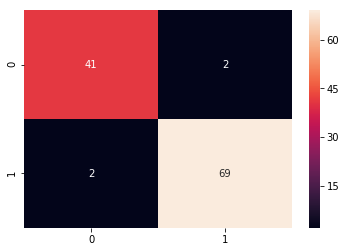

In [12]:
cf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

### Manually tweaking the Learning rate and number of iterations will give better result